<a href="https://colab.research.google.com/github/nevermind78/Capstone/blob/main/MLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!wget https://github.com/nevermind78/Capstone/blob/main/sepsis_Data2.csv
#!wget https://github.com/nevermind78/Capstone/raw/main/finalized_model.sav
!wget https://github.com/nevermind78/Capstone/raw/main/finalized_model2.sav

--2021-12-09 19:40:01--  https://github.com/nevermind78/Capstone/blob/main/sepsis_Data2.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘sepsis_Data2.csv.1’

sepsis_Data2.csv.1      [ <=>                ] 152.79K  --.-KB/s    in 0.08s   

2021-12-09 19:40:02 (1.95 MB/s) - ‘sepsis_Data2.csv.1’ saved [156460]

--2021-12-09 19:40:02--  https://github.com/nevermind78/Capstone/raw/main/finalized_model2.sav
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nevermind78/Capstone/main/finalized_model2.sav [following]
--2021-12-09 19:40:02--  https://raw.githubusercontent.com/nevermind78/Capstone/main/finalized_model2.sav
Resolving raw.githubusercontent.com (raw.githubuse

# Code for MLP Classifier Algorithm

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [37]:
dataset = pd.read_csv("https://raw.githubusercontent.com/nevermind78/Capstone/main/sepsis_Data2.csv")
dataset=dataset.drop("Unnamed: 0",axis=1)
dataset.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,61.0,99.0,36.44,124.0,65.0,43.0,17.5,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,2,0
1,64.0,98.0,36.44,125.0,64.0,41.0,27.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,3,0
2,56.0,100.0,36.44,123.0,65.0,41.0,9.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,4,0
3,66.0,99.0,36.22,120.0,67.0,43.0,23.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,5,0
4,94.0,100.0,36.22,194.0,116.0,66.0,14.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,6,0


In [38]:
from sklearn.utils import resample
df_majority = dataset[dataset.SepsisLabel==0]
df_minority = dataset[dataset.SepsisLabel==1]

In [39]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=57070,    # to match majority class
                                 random_state=123) # reproducible results

In [40]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [41]:
df_upsampled.SepsisLabel.value_counts()

1    57070
0    57070
Name: SepsisLabel, dtype: int64

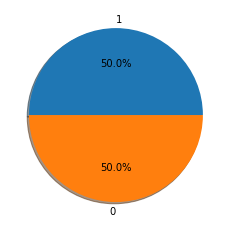

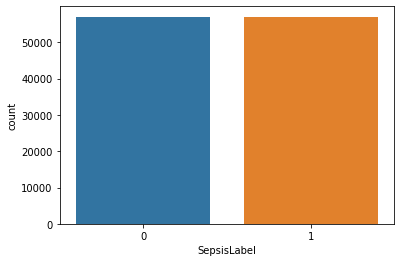

In [42]:
plt.pie(df_upsampled['SepsisLabel'].value_counts(), labels=['1','0'], autopct='%1.1f%%', shadow=True)
plt.show()
sns.countplot(x=df_upsampled['SepsisLabel'], label="Count")
plt.show()

In [43]:
X = df_upsampled[df_upsampled.columns[0:40]].values

In [44]:
Y = df_upsampled[df_upsampled.columns[40:]].values


In [45]:
print("sepsis dimensions : {}".format(df_upsampled.shape))

sepsis dimensions : (114140, 41)


In [46]:
print("sepsis dimensions without label : {}".format(X.shape))

sepsis dimensions without label : (114140, 40)


In [47]:
print("sepsis dimensions only label : {}".format(Y.shape))

sepsis dimensions only label : (114140, 1)


In [48]:
labelencoder_Y = preprocessing.LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
print("Training data dimensions :{}".format(X_train.shape))
print("Testing data dimensions :{}".format(X_test.shape))

Training data dimensions :(91312, 40)
Testing data dimensions :(22828, 40)


In [51]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neural_network import MLPClassifier

In [52]:
clf=MLPClassifier(
    activation='tanh',
    solver='lbfgs',
    early_stopping=False,
    hidden_layer_sizes=(40,10,10,10,10, 2),
    random_state=1,
    batch_size='auto',
    max_iter=13000,
    learning_rate_init=1e-5,
    tol=1e-4,)

In [53]:
clf.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='tanh', hidden_layer_sizes=(40, 10, 10, 10, 10, 2),
              learning_rate_init=1e-05, max_iter=13000, random_state=1,
              solver='lbfgs')

In [54]:
import pickle


In [55]:
# save the model to disk
filename = 'finalized_model2.sav'
pickle.dump(clf, open(filename, 'wb'))

In [56]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.9731470124408621


In [57]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay


In [58]:
predicted = loaded_model.predict(X_test)
print(predicted.shape)
print(Y_test.shape)
print(confusion_matrix(Y_test,predicted))

(22828,)
(22828,)
[[11096   338]
 [  275 11119]]


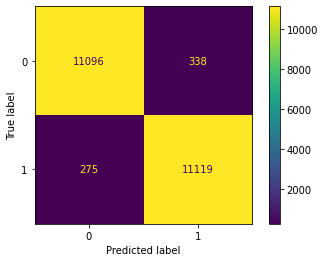

In [59]:
cm=confusion_matrix(Y_test,predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()


In [60]:
!wget https://raw.githubusercontent.com/nevermind78/Capstone/main/test_D.csv

--2021-12-09 21:33:55--  https://raw.githubusercontent.com/nevermind78/Capstone/main/test_D.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4777460 (4.6M) [text/plain]
Saving to: ‘test_D.csv’

test_D.csv          100%[===================>]   4.56M  --.-KB/s    in 0.07s   

2021-12-09 21:33:55 (61.5 MB/s) - ‘test_D.csv’ saved [4777460/4777460]



In [62]:
df_test =pd.read_csv('test_D.csv')
df_test=df_test.drop("Unnamed: 0",axis=1)
dataset.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,61.0,99.0,36.44,124.0,65.0,43.0,17.5,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,2,0
1,64.0,98.0,36.44,125.0,64.0,41.0,27.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,3,0
2,56.0,100.0,36.44,123.0,65.0,41.0,9.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,4,0
3,66.0,99.0,36.22,120.0,67.0,43.0,23.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,5,0
4,94.0,100.0,36.22,194.0,116.0,66.0,14.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,6,0


In [63]:
X2_test = df_test[df_test.columns[0:40]].values


In [65]:

Y2_test = df_test[df_test.columns[40:]].values
Y2_test
labelencoder_Y = preprocessing.LabelEncoder()
Y2_test = labelencoder_Y.fit_transform(Y2_test)
Y2_test

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

In [66]:
print("sepsis dimensions without label : {}".format(X2_test.shape))

sepsis dimensions without label : (25210, 40)


In [67]:
print("sepsis dimensions without label : {}".format(Y2_test.shape))

sepsis dimensions without label : (25210,)


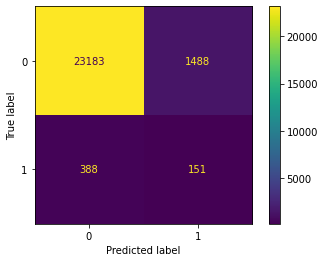

In [68]:
loaded_model = pickle.load(open('finalized_model2.sav', 'rb'))
predicted = loaded_model.predict(X2_test)
cm=confusion_matrix(Y2_test,predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=loaded_model.classes_)
disp.plot()
plt.show()

In [69]:
result = loaded_model.score(X2_test, Y2_test)
print(result)

0.9255850852836176


In [70]:
from sklearn.metrics import precision_score, classification_report,average_precision_score, accuracy_score, balanced_accuracy_score, precision_recall_curve, f1_score, auc, roc_curve

In [ ]:
import numpy as np
def predictors_labels_allocator(df):
    
    """
    function that allocate predictors and labels
    
    @param: df: Dataframe, complete dataframe
    @return: X: Numpy Array, predictors
             y: Numpy Array, labels
    """
    col_names = df.columns
    X = np.array(df[col_names[:-1]].values)
    y = df[col_names[-1]].values
    
    return X, y

In [ ]:
Xtr, ytr = predictors_labels_allocator(dataset)  


(58376, 40)

In [78]:
yhat_probas = loaded_model.predict_proba(X_test)


In [72]:
pip install plot-metric

In [73]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import random
from plot_metric.functions import BinaryClassification

In [74]:
def plot_ROC(y_test, y_score, n_classes=2):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr['positive'], tpr['positive'], _ = roc_curve(y_test, y_score)
    roc_auc['positive'] = auc(fpr['positive'], tpr['positive'])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure()
    lw = 2
    plt.plot(fpr['positive'], tpr['positive'], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['positive'])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

In [79]:
Y_test

array([1, 0, 0, ..., 1, 1, 0])

In [80]:
X_test

array([[ 9.9000e+01,  9.4000e+01,  3.7560e+01, ...,  0.0000e+00,
        -2.0000e-02,  2.0000e+01],
       [ 6.8000e+01,  1.0000e+02,  3.5940e+01, ...,  0.0000e+00,
        -6.5700e+00,  1.4000e+01],
       [ 6.2000e+01,  9.6000e+01,  3.5390e+01, ...,  0.0000e+00,
        -2.6118e+02,  2.8000e+01],
       ...,
       [ 8.6000e+01,  9.7000e+01,  3.6890e+01, ...,  0.0000e+00,
        -1.4006e+02,  3.0000e+00],
       [ 9.6000e+01,  1.0000e+02,  3.6670e+01, ...,  0.0000e+00,
        -3.0000e-02,  1.9200e+02],
       [ 1.0700e+02,  9.6000e+01,  3.8110e+01, ...,  0.0000e+00,
        -1.0000e-02,  5.5000e+01]])

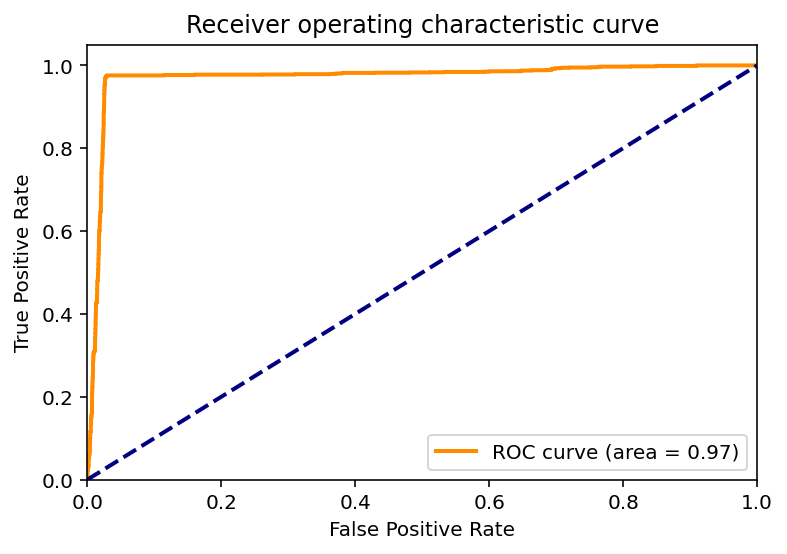

In [81]:
plot_ROC(Y_test,yhat_probas[:,1])